# Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## Import Libraries

In [110]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 


## Read Data

In [111]:
df = pd.read_csv("/Users/sahil/Documents/Project/5k_stroke-data.csv")

### View Information

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### View Shape

In [113]:
df.shape

(5110, 12)

### View Sample

In [114]:
df.head(5) 
# To display the top 5 rows 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [115]:
df.tail()
# To display the bottom 5 rows 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Summary of Numerical Data

The 5-point summary or Statistical summary tells the descriptive summary which includes: 

- Mean
- Median
- Mode
- Maximum value
- Minimum value

In [116]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [117]:
# Dropping ID, it is not important
df = df.drop(columns=['id'], axis=1)

In [118]:
categorical_cols = [col for col in df.columns.tolist() if col not in df.describe().columns.tolist()]
print(categorical_cols)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


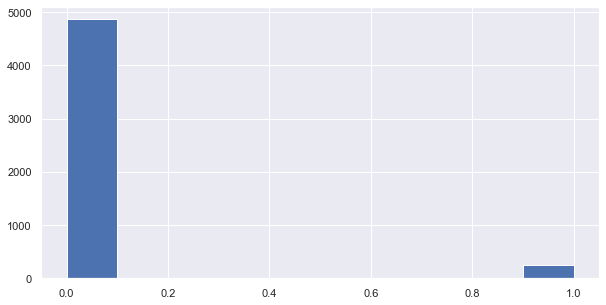

In [119]:
# Histogram (Distribution Plot)
numerical_cols = df.describe().columns.tolist()

df['stroke'].hist(figsize=(10, 5));

### Summary of Categorical Data

Understand the distinct values and their proportion in data set.

- Value Counts
- Bar plot

In [120]:
categorical_cols = [col for col in df.columns.tolist() if col not in df.describe().columns.tolist()]
print(categorical_cols)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


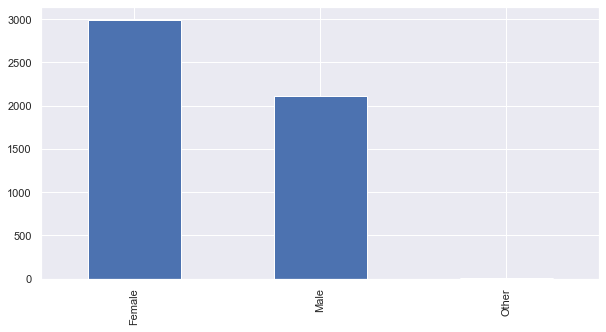

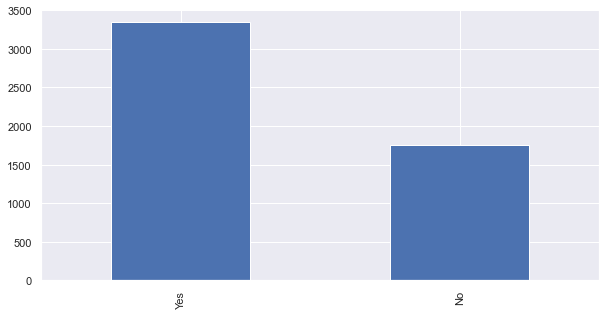

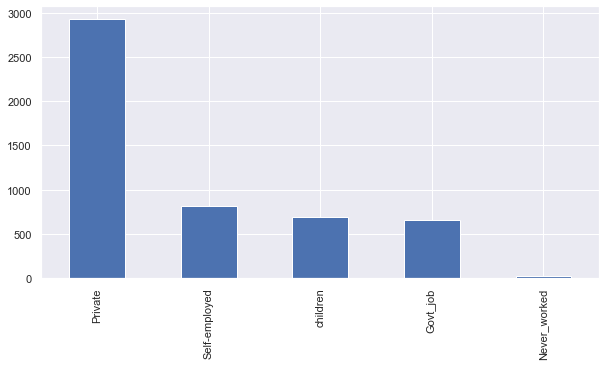

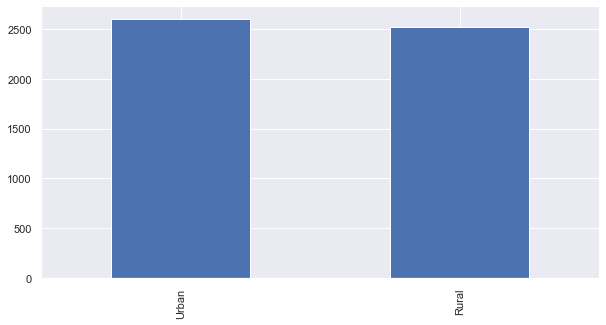

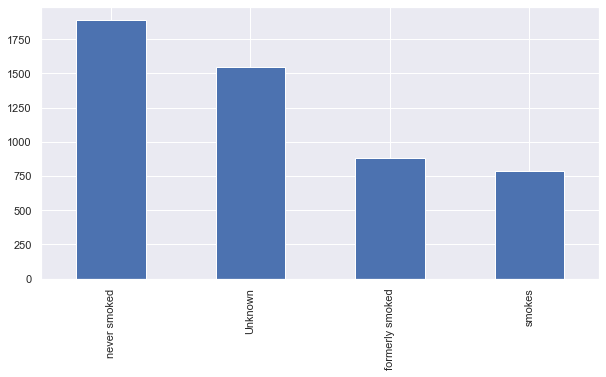

In [105]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar',figsize = (10,5))
    plt.show();

In [126]:
#Removing "Other" in gender since there is only 1 entry
df= df[df['gender'] != 'Other']

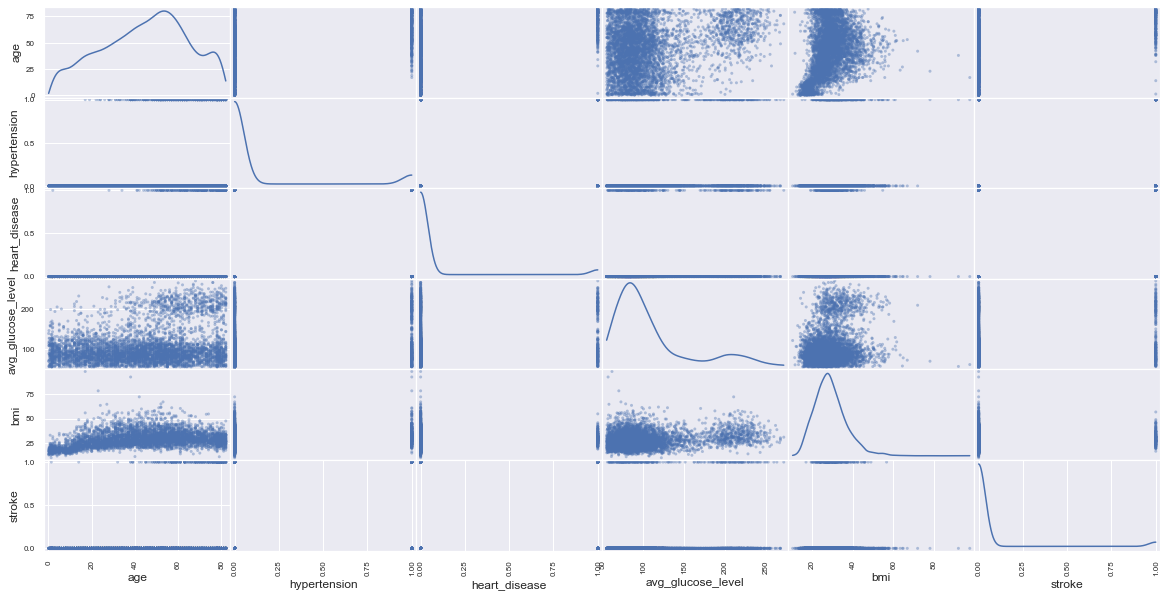

In [127]:
# Pairplot

pd.plotting.scatter_matrix(df, alpha=0.4, figsize=(20,10 ), diagonal='kde');

In [ ]:
numerical_cols_new = df.describe().columns.tolist()
numerical_cols_new.remove('hypertension')
numerical_cols_new.remove('heart_disease')
numerical_cols_new.remove('stroke')

['age', 'avg_glucose_level', 'bmi']


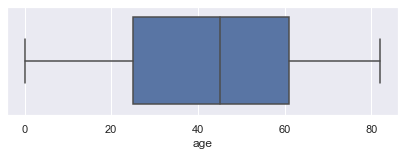

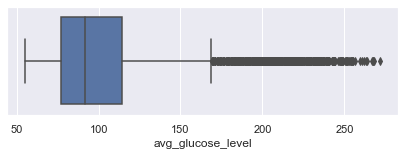

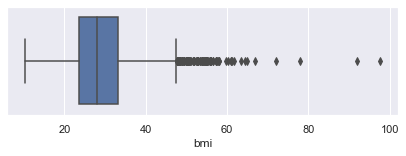

In [140]:
# Outliers Check
print(numerical_cols_new)
for col in numerical_cols_new:
    plt.figure(figsize=(7,2))
    sns.boxplot(x=df[col])
    plt.show()

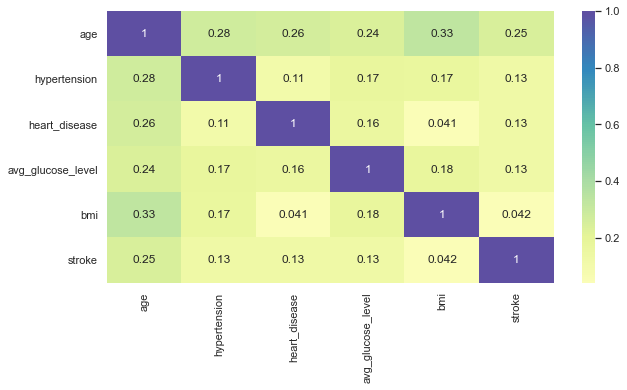

In [141]:
# Correlation Plot

plt.figure(figsize=(10,5))
c = df.corr(method='pearson')
sns.heatmap(c,cmap='Spectral', center = 0, annot= True)
plt.show();

## Data Pre-processing

- Handling Missing/Null Values
- Handling Outliers
- Handling Rare Values
- Handling Categorical Variables


### Handling Missing/Null Values

`Find missing values using isnull()`


- Drop
    - may discard too much data and hurt the model
- Imputation 
    - Mean/Median/Mode
    - End of distribution
    - Arbitrary Value 
    - Add a variable to denote NA

In [18]:
missing = pd.concat([df.isnull().sum(),df.isnull().mean()],axis=1)
missing = missing.rename(index=str,columns={0:'total missing',1:'proportion'})
missing

,total missing,proportion
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,0.039335


#### Drop
Excluding all cases (listwise) that have missing values

In [20]:
df_copy = df.copy(deep=True)
df_copy = df_copy.dropna(axis=0,inplace=False)
print(df.shape,df_copy.shape)
print("dropped ") 
print((df.shape[0]-df_copy.shape[0]))

(5110, 12) (4909, 12)
dropped 
201
